## Thu thập dữ liệu và Giới thiệu về dữ liệu

Bộ dữ liệu nhóm sử dụng là bộ dữ liệu đã được thu thập về AQI (Air Quality Index - Chỉ số chất lượng không khí) ở các nơi khác nhau trong Việt Nam vào năm 2020, dữ liệu có các loại đối tượng được đo lường khác nhau như nhiệt độ, độ ẩm, tốc độ gió,...

Bộ dữ liệu được lấy thông qua trang web https://data.vietnam.opendevelopmentmekong.net/en/dataset/timelines-dataset-on-air-quality-in-vietnam/resource/c3712765-0d13-4d83-8695-fe803a6d9933

----

## Thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

----

## Khám phá dữ liệu

### Đọc dữ liệu

In [2]:
df = pd.read_csv('aqi_airqualitydata_2020_en.csv',',')
df.head(10)

,Date,Country,City,Specie,count,min,max,median,variance
0,17/07/2020,VN,Ho Chi Minh City,temperature,24,26.0,34.0,29.5,59.13
1,21/10/2020,VN,Ho Chi Minh City,temperature,24,26.0,31.0,27.0,26.23
2,07/11/2020,VN,Ho Chi Minh City,temperature,24,25.0,32.5,28.0,69.20
3,22/11/2020,VN,Ho Chi Minh City,temperature,24,24.0,33.5,26.0,102.39
4,10/01/2020,VN,Ho Chi Minh City,temperature,24,23.5,34.0,28.5,125.65
5,27/01/2020,VN,Ho Chi Minh City,temperature,24,25.0,32.0,26.0,64.40
6,19/03/2020,VN,Ho Chi Minh City,temperature,24,27.0,34.5,28.0,83.97
7,18/05/2020,VN,Ho Chi Minh City,temperature,24,28.5,36.5,31.0,73.87
8,28/05/2020,VN,Ho Chi Minh City,temperature,24,27.0,34.0,28.0,43.58
9,27/08/2020,VN,Ho Chi Minh City,temperature,24,27.0,34.0,30.0,58.37


----

### Thông tin cơ bản

**Số dòng và cột**

In [3]:
df.shape

(16227, 9)

**Ý nghĩa của từng cột**

In [4]:
df.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance'],
      dtype='object')

- **Date**: ngày đo lường
- **Country**: quốc gia
- **City**: thành phố
- **Specie**: đối tượng được đo lường
- **count**: số lần đo lường trong 1 ngày
- **min**: giá trị thấp nhất của đối tượng đo lường trong 1 ngày
- **max**: giá trị cao nhất của đối tượng đo lường trong 1 ngày
- **median**: giá trị trung vị của đối tượng đo lường trong 1 ngày
- **variance**: giá trị phương sai của đối tượng đo lường trong 1 ngày

**Kiểu dữ liệu của từng cột**

In [5]:
df.dtypes

Date         object
Country      object
City         object
Specie       object
count         int64
min         float64
max         float64
median      float64
variance    float64
dtype: object

**Cột bất thường**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16227 entries, 0 to 16226
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      16227 non-null  object 
 1   Country   16227 non-null  object 
 2   City      16227 non-null  object 
 3   Specie    16227 non-null  object 
 4   count     16227 non-null  int64  
 5   min       16227 non-null  float64
 6   max       16227 non-null  float64
 7   median    16227 non-null  float64
 8   variance  16227 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


Có vẻ như không có cột nào bất thường cả vì không có cột nào bị thiếu dữ liệu.

**Dòng bất thường**

In [7]:
df.isnull().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

Không có dòng bị thiếu, bất thường.

**Dòng bị lặp**

In [8]:
df.duplicated().sum()

0

----

## Tiền xử lý dữ liệu

**Cột cần loại bỏ**

Vì cột Country chỉ có 1 giá trị duy nhất là VN (dữ liệu này được lấy ở Việt Nam) nên ta sẽ bỏ cột này.

In [9]:
df['Country'].value_counts()

VN    16227
Name: Country, dtype: int64

In [10]:
df.drop('Country',axis=1,inplace=True)
df

,Date,City,Specie,count,min,max,median,variance
0,17/07/2020,Ho Chi Minh City,temperature,24,26.0,34.0,29.5,59.13
1,21/10/2020,Ho Chi Minh City,temperature,24,26.0,31.0,27.0,26.23
2,07/11/2020,Ho Chi Minh City,temperature,24,25.0,32.5,28.0,69.20
3,22/11/2020,Ho Chi Minh City,temperature,24,24.0,33.5,26.0,102.39
4,10/01/2020,Ho Chi Minh City,temperature,24,23.5,34.0,28.5,125.65
...,...,...,...,...,...,...,...,...
16222,26/02/2020,Ha Long,co,28,1.0,9.0,4.0,88.19
16223,27/02/2020,Ha Long,co,34,2.0,9.0,8.0,48.52
16224,29/02/2020,Ha Long,co,22,8.0,9.0,8.0,2.27
16225,24/06/2020,Ha Long,co,48,4.0,8.0,5.0,13.36


**Thay đổi kiểu dữ liệu thích hợp cho các cột**

Ta sẽ thay đổi kiểu dữ liệu cho cột date thành kiểu datetime, các cột có kiểu object ta sẽ chuyển thành kiểu string.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df['City'] = df['City'].astype('string')

df['Specie'] = df['Specie'].astype('string')

In [12]:
df.dtypes

Date        datetime64[ns]
City                string
Specie              string
count                int64
min                float64
max                float64
median             float64
variance           float64
dtype: object

**Thay đổi khác**

Trong cột Specie, có giá trị trùng tên nhau như: wind-speed và wind speed, wind-gust và wind gust, nên ta sẽ chuyển các Specie này theo 1 tên giống nhau.

In [13]:
df.loc[df['Specie'] == 'wind-speed', 'Specie'] = 'wind speed'
df.loc[df['Specie'] == 'wind-gust', 'Specie'] = 'wind gust'

In [14]:
df[(df['Specie'] == 'wind-speed') | (df['Specie'] == 'wind-gust')]

,Date,City,Specie,count,min,max,median,variance


----

## Khám phá dữ liệu (tiếp theo)

### Phân bố dữ liệu

**Kiểu numeric**

In [15]:
def missing_ratio(col):
    return col.isna().mean() * 100

def first_quartile(col):
    return col.quantile(0.25)

def third_quartile(col):
    return col.quantile(0.75)

In [16]:
num_col_profiles_df = df[['Date','count', 'min', 'max', 'median','variance']]
num_col_profiles_df = num_col_profiles_df.agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.mean,
                                               first_quartile, pd.Series.median, third_quartile])
num_col_profiles_df.round(3)

,Date,count,min,max,median,variance
missing_ratio,0.0,0.000,0.000,0.000,0.000,0.000
min,2019-12-30 00:00:00,2.000,-7.000,0.000,-3.000,0.000
max,2021-12-01 00:00:00,72.000,1026.000,1271.000,1028.500,622638.000
mean,2020-07-21 20:07:03.294509312,26.325,126.461,144.628,133.418,1106.045
first_quartile,2020-04-13 00:00:00,16.000,3.000,15.000,7.000,12.570
median,2020-07-18 00:00:00,24.000,18.000,28.000,22.300,51.300
third_quartile,2020-10-21 00:00:00,24.000,40.000,90.550,63.500,427.995


**Kiểu categorical**

In [17]:
cat_col_profiles_df = df[['City', 'Specie']]
cat_col_profiles_df = cat_col_profiles_df.agg([missing_ratio, pd.Series.unique, pd.Series.nunique])
cat_col_profiles_df

,City,Specie
missing_ratio,0.0,0.0
unique,"[Ho Chi Minh City, Hue, Ha Noi, Hai Phong, Ha ...","[temperature, humidity, wind speed, wind gust,..."
nunique,5,14


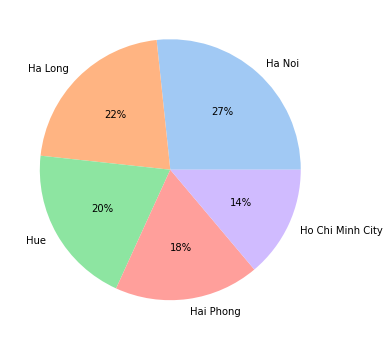

In [18]:
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['City'].value_counts().values,labels=df['City'].value_counts().index,colors=colors,autopct='%.0f%%');

Dữ liệu được lấy có sự phân bố ở các nơi khá đều nhau.

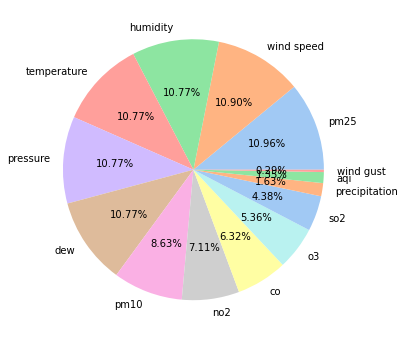

In [19]:
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:14]
plt.pie(df['Specie'].value_counts().values,labels=df['Specie'].value_counts().index,colors=colors,autopct='%.2f%%');

Cột Specie gồm có những giá trị:
   - temperature: nhiệt độ
   - humidity: độ ẩm
   - wind speed: tốc độ gió
   - wind gust: gió giật
   - pm25: bụi mịn 2.5 micron
   - dew: sương mù
   - pressure: áp suất
   - co: khí CO
   - pm10: bụi mịn 1.0 micron
   - so2: khí SO2
   - no2: khí NO2
   - o3: khí O3
   - aqi: chỉ số chất lượng không khí
   - precipitation: giáng thuỷ

----

## Phân tích hồi quy, giải thích và dự báo

### Phân tích hồi quy

Xem xét các mối quan hệ giữa các cặp trường dữ liệu.

**count với min (max, median hoặc variance)**

Ta sẽ xét trường count với min làm đại diện.

In [20]:
print(smf.ols('Q("count")~Q("min")', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             Q("count")   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.698
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.193
Time:                        21:40:23   Log-Likelihood:                -69042.
No. Observations:               16227   AIC:                         1.381e+05
Df Residuals:                   16225   BIC:                         1.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3972      0.145    182.284      0.0

Có thể thấy rằng R-squared bằng 0, tức là mối quan hệ giữa 2 trường này không chặt chẽ (hầu như không ảnh hưởng tới nhau).

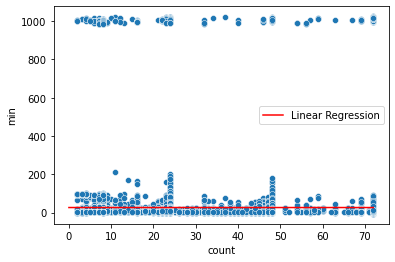

In [21]:
sns.scatterplot(x='count',y='min',data=df)
t = np.linspace(0, max(df['count']))
y = lambda x: -0.0006 * x + 26.3972
plt.plot(t, y(t),c='r',label='Linear Regression')
plt.legend()

Có những dữ liệu nằm quá xa so với đường linear.

**min với max (median hoặc variance)**

In [22]:
print(smf.ols('Q("min")~Q("max")', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               Q("min")   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.684e+06
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:40:24   Log-Likelihood:                -78141.
No. Observations:               16227   AIC:                         1.563e+05
Df Residuals:                   16225   BIC:                         1.563e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.8144      0.260    -72.422      0.0

Có thể thấy rằng R-squared bằng 0.99, tức là mối quan hệ giữa 2 trường này rất chặt chẽ.

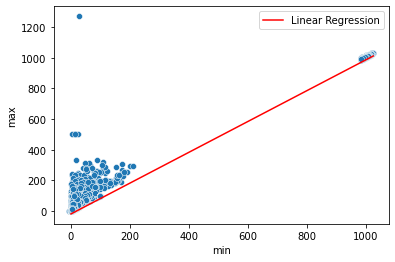

In [23]:
sns.scatterplot(x='min',y='max',data=df)
t = np.linspace(0, max(df['min']))
y = lambda x: 1.0045 * x - 18.8144
plt.plot(t, y(t),c='r',label='Linear Regression')
plt.legend()

----

### Giải thích và dự đoán

Vì bộ dữ liệu liên quan đến thời tiết thay vì sử dụng cách dự đoán như thông thường (chuẩn đoán dữ liệu nào đó vào loại nào) nhóm sẽ chọn 1 hình thức dự đoán khác đó là dự đoán tương lai (future prediction). Nhóm sẽ chọn cột max để làm cột để dự đoán tương lai đồng thời chọn city được dự đoán là Thành phố HCM.

In [24]:
new_df = df[df['City']=='Ho Chi Minh City']

# tách cột Date thành 3 cột year, month và day
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month
new_df['Day'] = new_df['Date'].dt.day

# sử dụng LabelEncoder để chuyển các cột categorical thành numeric
le = LabelEncoder()
specie = le.fit_transform(new_df['Specie'])
new_df['Specie'] = specie

# drop các cột không phù hợp cho việc dự đoán: Date, City, count
new_df.drop(['Date','City','count'],axis=1,inplace=True)
# sắp xếp dữ liệu theo ngày tăng dần để thuận tiện theo dõi
new_df = new_df.sort_values(['Year','Month','Day'])
new_df

<ipython-input-24-97190dc5b43e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Date'].dt.year
<ipython-input-24-97190dc5b43e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = new_df['Date'].dt.month
<ipython-input-24-97190dc5b43e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Specie,min,max,median,variance,Year,Month,Day
1233,2,46.0,168.0,89.0,20188.60,2019,12,30
1192,2,55.0,156.0,82.0,6151.58,2019,12,31
1224,2,42.0,154.0,74.0,8109.11,2020,1,1
341,4,24.0,31.5,26.0,64.76,2020,1,2
706,1,42.5,75.5,57.0,1240.54,2020,1,2
...,...,...,...,...,...,...,...,...
559,1,36.0,73.0,51.5,1460.00,2021,12,1
1014,6,1.8,4.1,2.8,3.48,2021,12,1
1237,2,50.0,95.0,68.0,1529.49,2021,12,1
1656,0,14.0,17.0,14.5,8.67,2021,12,1


In [25]:
y = new_df['max']
X = new_df.drop('max',axis=1)

# tách tập train và tập test theo tỷ lệ 70/30
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.30,random_state=4)

Để dự đoán tương lai, nhóm sẽ sử dụng phương pháp RandomForestRegressor vì phương pháp này có thể sử dụng để dự đoán các dữ liệu liên tục vì vậy mà có thể dự đoán được tương lai gần.

In [26]:
print('Training X shape:', train_X.shape)
print('Training y shape:', train_y.shape)
print('Testing X shape:', test_X.shape)
print('Testing y shape:', test_y.shape)

# khởi tạo model
rf = RandomForestRegressor(n_estimators=1000, random_state=4)
rf.fit(train_X, train_y)

# dự đoán
predictions = rf.predict(test_X)
print(predictions)

# tính toán MAE
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# tính toán độ chính xác
mape = 100* (errors/test_y)
accuracy = 100 - np.mean(mape/3)
print('Accuracy of the model:', round(accuracy,2),'%')

Training X shape: (1574, 7)
Training y shape: (1574,)
Testing X shape: (675, 7)
Testing y shape: (675,)
[  99.55     26.424    31.9985   25.0905   99.943    26.535     3.7044
  160.73     89.6725   24.52     26.798  1012.1535    5.8789   77.9965
   32.421     5.3521 1009.6825    4.607    87.9375   22.9775    4.666
   95.1325  102.4335  116.703    25.941  1008.4345 1011.009     5.3416
 1006.46   1012.0875   25.262    26.053    96.       83.78     92.9095
   36.203    25.8125   31.166    26.1115    4.7437    4.6524   77.862
 1009.319  1008.294    22.428    85.7295 1009.76   1015.014    35.089
   20.67     97.405    68.6735  108.916     6.2458    5.6586   25.2525
  161.599  1011.963   109.276    81.0085 1010.028    84.5325  100.66
   83.1275  115.521    86.1875   32.7885 1006.814    99.871     3.0622
    3.5172   88.7115   21.2147   34.937    26.8975  116.525    24.225
   99.631    99.934    99.85     91.8025 1008.982  1011.13     83.2535
    5.876    26.315    35.51      4.682    22.9465

Với độ chính xác 98,7%, model trên là model tốt nhất để dự đoán tương lai.